In [1]:
!pip install gensim
!pip install testfixtures

    100% |████████████████████████████████| 92kB 6.6MB/s ta 0:00:011


In [2]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
from gensim.models import Doc2Vec
from gensim.test.utils import get_tmpfile
import os
import numpy as np
from numpy import dot
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import gensim
from numpy import dot, absolute
from numpy.linalg import norm

In [3]:
cwd = os.getcwd()
fname_dbow = get_tmpfile(cwd + "/dbow_model")
model_dbow = Doc2Vec.load(fname_dbow)
fname_dmm = get_tmpfile(cwd + "/dmm_model")
model_dmm = Doc2Vec.load(fname_dmm)

In [4]:
#writing function for common cosine similarity
def doc_words_cosine(model, doc_tag, words):
    doc_vec = model.docvecs[doc_tag]
    if len(words) < 1: 
        print("Error: Input dictionary not found")
        return
    elif len(words) > 1: #check if there are more than 1 word in the input
        word_vec_avg = np.sum(model_dmm[words], axis=0)/len(words) # find centroid
        word_vec_avg = word_vec_avg
    elif len(words) == 1:
        word_vec_avg = model_dmm[words]
    return absolute(dot(doc_vec, word_vec_avg)/(norm(doc_vec)*norm(word_vec_avg)))

In [5]:
inqseed = ['inquiry-based', 'problem-based', 'discovery', 'experiential', 'constructivist']

inq30 = ['discovery-based', 'student-driven_exploration', 'exploration_and_experimentation', 'laboratory-based', 
         'problem-based', 'prbl', 'learn-by-doing', 
         'project-based', 'project-centered', 
         'experiential', 'experiential_approach', 'experientially',
         'inquiry-based', 'inquiry-driven', 'student-centered_inquiry-based', 'active_inquiry', 
         'constructivist', 'constructivism', 
         'hands-on', 'hand-on', 'hands-on_learning', 'hands-on_and_minds-on', 'hands-on_minds-on', 'hands-on/minds-on', 
         'socratic', 'socratic_method', 'socratic_dialogue',
         'child-centered', 'learner-centered', 'student-centered']

inq100 = ['discovery-based', 'student-driven_exploration', 'exploration_and_experimentation', 'laboratory-based', 'problem-based', 'prbl', 'learn-by-doing', 'project-based', 'project-centered', 'experiential', 'experiential_approach', 'experientially', 'inquiry-based', 'inquiry-driven', 'student-centered_inquiry-based', 'active_inquiry', 'constructivist', 'constructivism', 'hands-on', 'hand-on', 'hands-on_learning', 'hands-on_and_minds-on', 'hands-on_minds-on', 'hands-on/minds-on', 'socratic', 'socratic_method', 'socratic_dialogue', 'child-centered', 'learner-centered', 'student-centered', 'arithmetic_reasoning', 'climate_improvement/improvement', 'awaken_the_imagination', 'cross-content', 'abilities_will_be_maximized', 'core-content_courses', 'benefits_of_co-op', 'proxy_servers', 'twinery', 'theme-based', 'relevant_to_the_viability', 'interdisciplinary', 'cogent', 'open-mindedness', 'reinforce_previously', 'equipping_educators', 'mentorships', 'nonpolitical', 'trained_appraisers', 'lightness', 'respective_histories', 'instruction_cgi', 'sustaining_of_a_genuine', 'natural', 'case-based', 'indispensable', 'timeless_but_indispensable', 'prohibitively_expensive', 'disparate_personalities', 'inspiring', 'richness_and_strength', 'experience-based', 'thorough_and_accurate', 'vitals', 'obsolescence', 'ellipsis_points', 'circles_graphed', 'polite_manners', 'homeschool-friendly', 'participating_in_acting/music/arts', 'develop/implement', 'willow_seedling', 'non-coercive', 'gender-nonconforming', 'activity/project', 'identification_of_learning/behavioral', 'orientating', 'interdependence', 'individual/personalized_manner', 'technological_modalities', 'experimentation', 'particularly_vulnerable', 'curiosity', 'discerning_listeners', 'approaches_such_as_sheltered', 'rule-making', 'dissipate', 'mirror_real-life', 'product/outcome', 'expeditions', 'wishful', 'conceiving', 'independence', 'drove_the_expedition', 'thrives', 'functional_weakness', 'would_be_off-putting', 'collaborative_student-community', 'trustee_elections', 'evaluate_the_motives']

inq500 = ['active_inquiry',
 'child-centered',
 'constructivism',
 'constructivist',
 'discovery-based',
 'experiential',
 'experiential_approach',
 'experientially',
 'exploration_and_experimentation',
 'hand-on',
 'hands-on',
 'hands-on/minds-on',
 'hands-on_and_minds-on',
 'hands-on_learning',
 'hands-on_minds-on',
 'inquiry-based',
 'inquiry-driven',
 'laboratory-based',
 'learn-by-doing',
 'learner-centered',
 'prbl',
 'problem-based',
 'project-based',
 'project-centered',
 'socratic',
 'socratic_dialogue',
 'socratic_method',
 'student-centered',
 'student-centered_inquiry-based',
 'student-driven_exploration',
 'abilities',
 'abilities_will_be_maximized',
 'ability-grouped',
 'acquire_requisite',
 'activities',
 'activities/lessons',
 'activity/project',
 'adept_at_facilitating',
 'adherents',
 'adjusted_and_thrived',
 'admittedly_fallible',
 'agile',
 'aligned_to_the_ngss',
 'allegiances',
 'altered/added',
 'amazed_by_the_generosity',
 'anecdotes',
 'appealing_and_relevant',
 'approaches_such_as_sheltered',
 'appropriately_allocated',
 'architecture',
 'arguments_and_informative/explanatory',
 'arithmetic_reasoning',
 'art-filled',
 'artistic',
 'assemble_the_pieces',
 'atomic_nucleus',
 'awaken_the_imagination',
 'bearing_on_the_viability',
 'benefits_of_co-op',
 'bi-literacy',
 'brain-compatible',
 'brain-friendly',
 'break/gross_motor',
 'brighter_tomorrow',
 'brilliantly_infused',
 'brochure_to_solidify',
 'c++_programming',
 'capitalism_and_socialism',
 'career-focused_and_technical',
 'carefully_weigh',
 'case-based',
 'championing_issues',
 'channels_their_energies',
 'character-based_strengths',
 'checking-for-understanding',
 'child-centered_individualized',
 'child-sized_furniture',
 'circles_graphed',
 'circulatory_and_nervous',
 'city-planning',
 'civically_active',
 'classical/stem_based',
 'climate_improvement/improvement',
 'coaches/leaders',
 'cogent',
 'cognitively_demanding',
 'coherent_sequenced',
 'cohesiveness',
 'collaborate_on_a_large-scale',
 'collaborative_student-community',
 'college-level_options',
 'colorism',
 'comma_rules',
 'commensurate_with_their_abilities',
 'committing_offenses',
 'commonly_confused',
 'communication/collaboration',
 'community-wide',
 'comparing_the_inputs',
 'compelling_paragraphs',
 'competency_and_mastery',
 'complex_adult-world',
 'complexity',
 'comprehensibility',
 'comprehensive_16-hour',
 'conceiving',
 'concept/skill',
 'concurrently_with_the_choreography',
 'considering_waldorf',
 'constructivist-based',
 'consultation/collaboration',
 'content-rich_nonfiction',
 'content-specific',
 'context',
 'continous',
 'continuity_and_commitment',
 'core-content_courses',
 'craftsmanship',
 'create_spectacles',
 'creative',
 'creativity',
 'critical-thinkers',
 'critical-thinking',
 'cross-content',
 'crystallization',
 'cultural_diversities',
 'cultural_heritages',
 'curiosity',
 'curriculum/standards',
 'data-rich',
 'decision-making',
 'decisionmaking_skills',
 'deepen',
 'deeper',
 'definiteness',
 'demanding_college-preparatory',
 'derivations',
 'describe_distributions',
 'design2fab_lab',
 'develop/implement',
 'developing',
 'dialoguing',
 'diaries_and_journals',
 'different/',
 'differentiated/personalized',
 'differing_structure',
 'discerning_listeners',
 'discover',
 'disempower',
 'disparate_personalities',
 'dissection_techniques',
 'dissipate',
 'distraction-free',
 'drafting_and_revising',
 'drove_the_expedition',
 'dynamic_collaboration',
 'dynamically_and_immediately',
 'edifying',
 'editing_and_proofing',
 'effectiveness_of_metacognitive',
 'effects_of_repetition',
 'efficacy_by_encouraging',
 'eliminating_unnecessary',
 'elitism',
 'ellipsis_points',
 'embraced_and_supported',
 'emojis',
 'encourage',
 'encouraging',
 'enduring_conceptual',
 'enduring_relationships',
 'engaged_citizen',
 'engaging',
 'enlargement',
 'ennoble',
 'ennobling_effect',
 'environment',
 'equipping_educators',
 'esl/family',
 'evaluate_the_motives',
 'evidence_in_a_nuanced',
 'examples_evoke',
 'expeditions',
 'experience-based',
 'experiental_learning',
 'experimental_labs',
 'experimentation',
 'exploration',
 'explorations',
 'explorative',
 'expose_them_to_a_wider',
 'exposed_to_a_coherent',
 'facilitation_techniques',
 'faint_of_heart',
 'feedback',
 'field-based',
 'fieldwork',
 'filming',
 'fiscal_mismanagement',
 'force_to_be_reckoned',
 'fostered',
 'fostering',
 'fuels_my_desire',
 'fully-vetted',
 'functional_weakness',
 'gender-nonconforming',
 'generalizations_and_predictions',
 'gets_maximized',
 'goal-driven',
 'gods_of_asgard',
 'grade-by-grade_year-by-year',
 'gradual_manner',
 'grander_scale',
 'grapple_with_difficult',
 'greek_philosophers',
 'grit_and_zest',
 'growth',
 'hands‑on',
 'harmonize',
 'headmaster_letters',
 'helps',
 'higher-level_cognitive',
 'highly_scripted',
 'home-away-from-home',
 'homeschool-friendly',
 'hope',
 'humanism',
 'humanities_major',
 'identification_of_learning/behavioral',
 'immersive',
 'implant_into_the_memories',
 'in-demand_transportable',
 'incorporating_the_principles',
 'increased_connectedness',
 'independence',
 'indispensable',
 'individual/personalized_manner',
 'individualize_and_differentiate',
 'inflected',
 'innovativeness',
 'inquiry/research',
 'inspire',
 'inspiring',
 'instruction_cgi',
 'integrated',
 'intelligent_and_intentional',
 'inter-dependence',
 'interdependence',
 'interdisciplinary',
 'interests',
 'interior_monologue',
 'internship/interest',
 'interpersonal',
 'investigate',
 'issues-based',
 'item/category_to_better',
 'jasmine_flower',
 'journaling',
 'joy-filled',
 'kinaesthetic',
 'laborious_process',
 'language-rich',
 'leader_and_a_follower',
 'learn',
 'learning',
 'learning-to-learn',
 'lens',
 'life-based',
 'life-long',
 'life-skill',
 'lifelong',
 'lightness',
 'literature-rich',
 'literature_has_tended',
 'loving_and_attentive',
 'low-ability',
 'lowest_in_achievement',
 'loyalty',
 'math/engineering',
 'maturationally_ready',
 'meaningful',
 'mentorship',
 'mentorships',
 'metacognitive',
 'micro-economic_ventures',
 'minds',
 'minds-on',
 'mirror_real-life',
 'mixed-ability',
 'modality',
 'motivate_their_attempts',
 'mud_hut',
 'multi-dimensional',
 'multi-disciplinary',
 'multi-faceted',
 'multiple-paragraph',
 'must-reads',
 'mutual',
 'myon_reader',
 'mythological_creature',
 'natural',
 'nature',
 'nature-based_perspective',
 'navigable',
 'near-daily_basis',
 'need-to-know_facts',
 'needing_improvement',
 'neuro-anatomy',
 'next_generation',
 'non-arts',
 'non-coercive',
 'non-dominant',
 'non-instrumental',
 'non-montessori',
 'noninfectious',
 'nonpolitical',
 'novel-based',
 'nurtures_mutual',
 'nurturing',
 'observation',
 'obsolescence',
 'one-segment',
 'one2one_digital',
 'open-mindedness',
 'orientating',
 'originated_in_cuba',
 'outcome-focused',
 'pace_most_suited',
 'parabolas_graphed',
 'parent/student/staff_compact',
 'participating_in_acting/music/arts',
 'particularly_vulnerable',
 'pedagogical_delivery',
 'pep-rally',
 'personalized',
 'perspective',
 'philosophical',
 'philosophies',
 'photographing',
 'pinata',
 'point-of-need',
 'polite_manners',
 'post-production_editing',
 'post-school_life',
 'power_of_student-faculty',
 'powers_of_abstraction',
 'practicality',
 'pre-teach',
 'precise_claim',
 'predicated_on_the_realization',
 'presumption_and_belief',
 'problem‑solving',
 'process-based_writing',
 'processes_recursively',
 'product/outcome',
 'prohibitively_expensive',
 'project-focused',
 'providing',
 'proxy_servers',
 'purveyors',
 'qualify_or_justify',
 'quality-learning',
 'quantitatively_as_well',
 'quiet',
 'ramp-up_to_readiness',
 're-forming',
 'real-life',
 'real-world',
 'reason_mathematically',
 'rectangular_array',
 'reduces_distractions',
 'refine_gross',
 'reinforce_previously',
 'reinterpret',
 'reinvention',
 'relatable_characters',
 'relational_capacity',
 'relationship-oriented_classroom',
 'relationships_between_pollinators',
 'relevant_to_the_viability',
 'reliability',
 'repeated_occurrence',
 'research-supported',
 'respective_histories',
 'review_of_progress-monitoring',
 'reﬂective',
 'richness_and_diversity',
 'richness_and_strength',
 'robot_to_maneuver',
 'rule-making',
 'scaled_scores',
 'school-life',
 'sculptural_forms',
 'sculptural_techniques',
 'self-appreciation',
 'self-awareness',
 'self-efficacy',
 'self-expression',
 'self-motivated',
 'sense_of_reverence',
 'sensory-motor',
 'sensory-rich',
 'sentence_workshopping',
 'settled_tribe',
 'shapes_and_their_attributes',
 'shared',
 'sherry_alam',
 'shows_that_metacognitive',
 'simulations_role-playing',
 'skills/family',
 'small-group',
 'small-group_discussion',
 'social/soft',
 'socialresponsibility',
 'standards-focused',
 'staunch_supporter',
 'stepstone_360°',
 'stewards',
 'stopped_and_looked',
 "story's_lesson",
 'stress-management',
 'strict/warm',
 'structurally_similar',
 'structured_and_predictable',
 'struggles_and_questioning',
 'student-directed',
 'student-driven',
 'study/teaching',
 'subject-area_integration',
 'succesful',
 'suit_their_needs',
 'superbowl_party',
 'supplemental_curricula',
 'sustainability',
 'sustaining_of_a_genuine',
 'symbolic_representations',
 'synthetic_phonics',
 'systematic_and_sequential',
 'tacitly',
 'target/objective',
 'teacher-to-teacher',
 'team-based_organizational',
 'techniques_namely',
 'technological_modalities',
 'technologies_and_our_science-based',
 'technology-assisted',
 'technology-infused',
 'technology–',
 'tedxyouth',
 'temper_tantrum',
 'text-analysis',
 'text_capitalcitypcs',
 'textbooks_affording',
 'thematic',
 'thematically',
 'theme-based',
 'themes',
 'theses',
 'thorough_and_accurate',
 'three-part_pattern',
 'thrives',
 'tight-knit',
 'time-management',
 'timeless_but_indispensable',
 'touchpoints',
 'trained_appraisers',
 'transgender',
 'tricycle',
 'trustee_elections',
 'tunnels_and_snowshed',
 'twinery',
 'unbidden_encounter',
 'understand',
 'understands',
 'unfamiliar_contexts',
 'unschooling',
 'uphold_and_enforce',
 'valued',
 'values-centered',
 'virtues',
 'virtuous',
 'visible_men',
 'vitals',
 'voluntarism',
 'wampanoag',
 'warm/strict',
 'ways_of_knowing/learning',
 'well-articulated_standards-based',
 'well-developed',
 'whole-group_explicit',
 'willow_seedling',
 'wishful',
 'world-view',
 'would_be_off-putting',
 'writing-centered',
 'writing—decoding',
 'yet-to-be-defined_future']

## checking that these words exist in the model and filtering

In [6]:
inqseed_filtered = []
for word in inqseed:
    try:
        emb = model_dmm[word]
        inqseed_filtered.append(word)
    except:
        pass

print("Total # of inqseed terms: ", len(inqseed_filtered))

Total # of inqseed terms:  5


In [7]:
inq30_filtered = []
for word in inq30:
    try:
        emb = model_dmm[word]
        inq30_filtered.append(word)
    except:
        pass
    
print("Total # of preserved inq30 terms: ", len(inq30_filtered))

Total # of preserved inq30 terms:  13


In [8]:
inq100_filtered = []
for word in inq100:
    try:
        emb = model_dmm[word]
        inq100_filtered.append(word)
    except:
        pass
    
print("Total # of preserved inq100 terms: ", len(inq100_filtered))

Total # of preserved inq100 terms:  27


In [9]:
inq500_filtered = []
for word in inq500:
    try:
        emb = model_dmm[word]
        inq500_filtered.append(word)
    except:
        pass
    
print("Total # of preserved inq500 terms: ", len(inq500_filtered))

Total # of preserved inq500 terms:  123


# Loading df

In [10]:
def quickpickle_load(picklepath):
    '''Very time-efficient way to load pickle-formatted objects into Python.
    Uses C-based pickle (cPickle) and gc workarounds to facilitate speed. 
    Input: Filepath to pickled (*.pkl) object.
    Output: Python object (probably a list of sentences or something similar).'''

    with open(picklepath, 'rb') as loadfile:
        
        gc.disable() # disable garbage collector
        outputvar = cPickle.load(loadfile) # Load from picklepath into outputvar
        gc.enable() # enable garbage collector again
    
    return outputvar

In [11]:
charters_path = "../../nowdata/traincf_2015.pkl" # All text data; only charter schools (regardless if open or not)
import gc # For managing garbage collector
import _pickle as cPickle # Optimized version of pickle

In [12]:
df = quickpickle_load(charters_path) # Load charter data into DF
print("DF loaded from " + str(charters_path) + "...")

DF loaded from ../../nowdata/traincf_2015.pkl...


In [13]:
rawcount_df = pd.read_csv("../../nowdata/parsing/dict_counts_df.csv", 
                          sep="\t", low_memory=False, encoding="utf-8")
print("Raw Count DF loaded from " + "../../nowdata/parsing/dict_counts_df.csv" + "...")

Raw Count DF loaded from ../../nowdata/parsing/dict_counts_df.csv...


In [14]:
rawcount_df['inqseed'] = rawcount_df['inqseed']/rawcount_df['NUMWORDS']
rawcount_df['inq30'] = rawcount_df['inq30']/rawcount_df['NUMWORDS']
rawcount_df['inq100'] = rawcount_df['inq100']/rawcount_df['NUMWORDS']
rawcount_df['inq500'] = rawcount_df['inq500']/rawcount_df['NUMWORDS']

In [15]:
#importing df with already cleaned text data
text_slow = pd.read_csv("InferSent/encoder/truncated_text.csv")
text_slow = text_slow.drop(['Unnamed: 0'], axis=1)

In [16]:
text_slow['NCESSCH'] = text_slow.NCESSCH.astype('int')
text_slow['NCESSCH'] = text_slow.NCESSCH.astype('str')

In [17]:
df = df.reset_index(drop=True)

In [18]:
#writing function for common cosine similarity
def doc_words_cosine(model, doc_tag, words, model_type):
    '''Returns a cosine similarity value between a document/school and a list of words of choice.
        
    Input: The model to be used, NCESSCH number, list of words, and the model type, which is either doc2vec or word2vec.
            
    Output: A scalar cosine similarity value.
        '''
    
    if model_type == "word2vec":
        s_sentences =  str.split(text_slow[text_slow.NCESSCH == str(int(doc_tag))].text_full)
        #initiailizing list for word embeddings
        ls = []
        for word in s_sentences:
            ls.append(model[word])
        doc_vec = np.mean(np.array(ls), axis=0)
    if model_type == "doc2vec":
        doc_vec = model.docvecs[str(int(doc_tag))]
    if len(words) < 1: 
        print("Error: Input dictionary not found")
        return
    elif len(words) > 1: #check if there are more than 1 word in the input
        word_vec_avg = np.sum(model_dmm[words], axis=0)/len(words) # find centroid
        word_vec_avg = word_vec_avg
    elif len(words) == 1:
        word_vec_avg = model_dmm[words]
    return absolute(dot(doc_vec, word_vec_avg)/(norm(doc_vec)*norm(word_vec_avg)))

In [19]:
doc_words_cosine(model_dmm, df.iloc[4,].NCESSCH, inqseed_filtered, 'doc2vec')

0.05959063

In [20]:
df.iloc[4,].NCESSCH

360105206271.0

In [21]:
inqseed_cosine = []
for i in range(len(df.NCESSCH)):
    cosine_value = doc_words_cosine(model_dmm, df.iloc[i,].NCESSCH, inqseed_filtered, 'doc2vec')
    inqseed_cosine.append(cosine_value)

In [22]:
inq30_cosine = []
for i in range(len(df.NCESSCH)):
    cosine_value = doc_words_cosine(model_dmm, df.iloc[i,].NCESSCH, inq30_filtered, 'doc2vec')
    inq30_cosine.append(cosine_value)

In [23]:
inq100_cosine = []
for i in range(len(df.NCESSCH)):
    cosine_value = doc_words_cosine(model_dmm, df.iloc[i,].NCESSCH, inq100_filtered, 'doc2vec')
    inq100_cosine.append(cosine_value)

In [24]:
inq500_cosine = []
for i in range(len(df.NCESSCH)):
    cosine_value = doc_words_cosine(model_dmm, df.iloc[i,].NCESSCH, inq500_filtered, 'doc2vec')
    inq500_cosine.append(cosine_value)

In [25]:
df['inqseed_cosine'] = inqseed_cosine
df['inq30_cosine'] = inq30_cosine
df['inq100_cosine'] = inq100_cosine
df['inq500_cosine'] = inq500_cosine

In [26]:
df_nn = df[df.WEBTEXT != '']

In [27]:
df_nn = df_nn.reset_index(drop=True)

In [28]:
print("Number of schools without N/A's: ", len(df_nn))

Number of schools without N/A's:  5459


In [29]:
rawcount_df = rawcount_df.reset_index(drop=True)

In [30]:
rawcount_df[rawcount_df.NCESSCH == df.NCESSCH[1]]['inqseed'].item()

0.0

In [31]:
#initializing lists for raw count values of seed, 30, 100, and 500 terms
inqseed_raw = []
inq30_raw = []
inq100_raw = []
inq500_raw = []

for i in range(len(df_nn)):
    inqseed_raw.append(rawcount_df[df.NCESSCH[i] == rawcount_df.NCESSCH]['inqseed'].item())
    inq30_raw.append(rawcount_df[df.NCESSCH[i] == rawcount_df.NCESSCH]['inq30'].item())
    inq100_raw.append(rawcount_df[df.NCESSCH[i] == rawcount_df.NCESSCH]['inq100'].item())
    inq500_raw.append(rawcount_df[df.NCESSCH[i] == rawcount_df.NCESSCH]['inq500'].item())

In [32]:
df_nn['inqseed_raw'] = inqseed_raw
df_nn['inq30_raw'] = inq30_raw
df_nn['inq100_raw'] = inq100_raw
df_nn['inq500_raw'] = inq500_raw

In [33]:
# #normalizing the columns
# df_nn['inqseed_raw'] = df_nn['inqseed_raw']/df_nn['NUMWORDS']
# df_nn['inq30_raw'] = df_nn['inq30_raw']/df_nn['NUMWORDS']
# df_nn['inq100_raw'] = df_nn['inq100_raw']/df_nn['NUMWORDS']
# df_nn['inq500_raw'] = df_nn['inq500_raw']/df_nn['NUMWORDS']

In [34]:
df_nn.inqseed_cosine.mean()

0.11057716892644089

In [35]:
#change this if you have more dictionary sizes
ls_lens = [len(inqseed_filtered), len(inq30_filtered), len(inq100_filtered), len(inq500_filtered)]
ls_avgs = [df_nn.inqseed_cosine.mean(), df_nn.inq30_cosine.mean(), df_nn.inq100_cosine.mean(), 
           df_nn.inq500_cosine.mean()]

In [36]:
import matplotlib.pyplot as plt

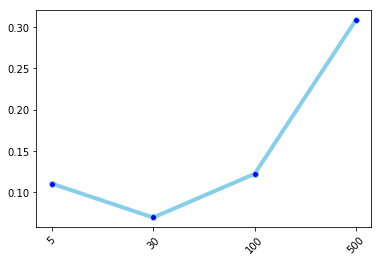

In [37]:
fig, ax1 = plt.subplots(1,1)

x1 = list(range(len(ls_lens)))
squad = ['5','30','100','500'] #change this if you have more dictionary sizes

ax1.set_xticks(x1)
ax1.set_xticklabels(squad, minor=False, rotation=45)
ax1.plot(x1, ls_avgs, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4)
plt.show()

In [38]:
ls_avgs = ls_avgs + [df_nn.inqseed_raw.mean(), df_nn.inq30_raw.mean(), df_nn.inq100_raw.mean(),
                    df_nn.inq500_raw.mean()]
ls_lens = ls_lens + [len(inqseed_filtered), len(inq30_filtered), len(inq100_filtered), len(inq500_filtered)]

In [39]:
ls_lens

[5, 13, 27, 123, 5, 13, 27, 123]

In [40]:
d = {'Strength': ls_avgs, 'Words':ls_lens, 'Metric':['Cosine','Cosine','Cosine',
                                                     'Cosine','Raw Count','Raw Count','Raw Count','Raw Count']}
dat = pd.DataFrame(data=d)
x1 = list(range(4)) #change this if you have more dictionary sizes
squad = ['5','30','100','500'] #change this if you have more dictionary sizes

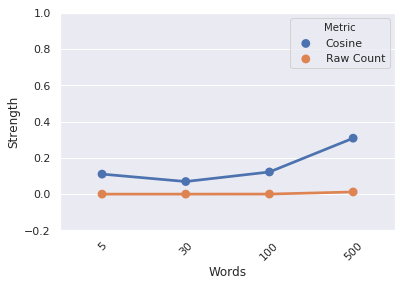

In [41]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#ax = sns.scatterplot(x="Words", y="Strength", data=dat)
ax = sns.pointplot(x="Words", y="Strength", hue="Metric", data=dat)
ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=45)
ax.set_ylim(-0.2,1)
plt.show()

In [58]:
df_nn['inq500_cosine'].corr(df_nn['inq500_raw'])

0.0072851773790490017

## Histogram plot of the cosine scores for seed, 30, 100, 500 terms.
### Using specific range and bin numbers in order to be able to make better graphical comparison.
#### if we want the line-of-distribution-fit off, do kde=False.

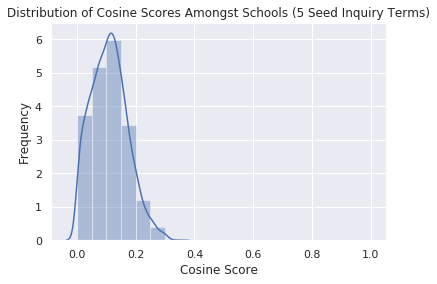

In [61]:
sns.distplot(df_nn.inqseed_cosine, bins=20, kde=True, hist_kws={'range':(0,1)})
plt.title("Distribution of Cosine Scores Amongst Schools (5 Seed Inquiry Terms)")
plt.xlabel("Cosine Score")
plt.ylabel("Frequency")
plt.show()

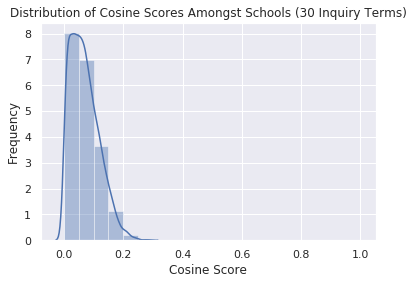

In [62]:
sns.distplot(df_nn.inq30_cosine, bins=20, kde=True, hist_kws={'range':(0,1)})
plt.title("Distribution of Cosine Scores Amongst Schools (30 Inquiry Terms)")
plt.xlabel("Cosine Score")
plt.ylabel("Frequency")
plt.show()

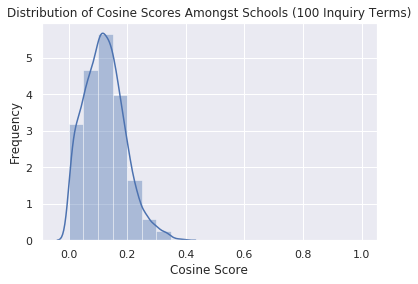

In [63]:
sns.distplot(df_nn.inq100_cosine, bins=20, kde=True, hist_kws={'range':(0,1)})
plt.title("Distribution of Cosine Scores Amongst Schools (100 Inquiry Terms)")
plt.xlabel("Cosine Score")
plt.ylabel("Frequency")
plt.show()

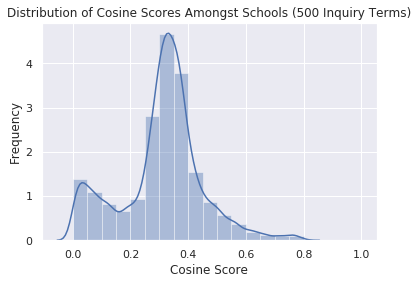

In [64]:
sns.distplot(df_nn.inq500_cosine, bins=20, kde=True, hist_kws={'range':(0,1)})
plt.title("Distribution of Cosine Scores Amongst Schools (500 Inquiry Terms)")
plt.xlabel("Cosine Score")
plt.ylabel("Frequency")
plt.show()

## Histogram plot for raw counts

ValueError: cannot convert float NaN to integer

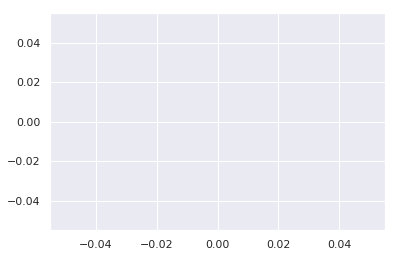

In [68]:
sns.distplot(df_nn.inq500_raw, kde=True)
plt.title("Distribution of Raw Counts Scores Amongst Schools (Seed Terms)")
plt.xlabel("Raw Counts")
plt.ylabel("Frequency")
plt.show()